<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Материалы Юстины Ивановой: https://github.com/yustinaivanova/netology_statistics_february_20

# Домашняя работа №3

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics
from scipy.stats import pearsonr

Загрузить датасет по url:


In [3]:
# следующая строчка подключает сертификат для защищенного соединения
#ssl._create_default_https_context = ssl._create_unverified_context
# все данные загружаются с сервера
#url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
#df=pd.read_csv(url)
df=pd.read_csv('world-happiness-report-2019.csv')

Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [6]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country (region)         156 non-null    object 
 1   Ladder                   156 non-null    int64  
 2   SD of Ladder             156 non-null    int64  
 3   Positive affect          155 non-null    float64
 4   Negative affect          155 non-null    float64
 5   Social support           155 non-null    float64
 6   Freedom                  155 non-null    float64
 7   Corruption               148 non-null    float64
 8   Generosity               155 non-null    float64
 9   Log of GDP
per capita    152 non-null    float64
 10  Healthy life
expectancy  150 non-null    float64
dtypes: float64(8), int64(2), object(1)
memory usage: 13.5+ KB


In [31]:
df['Positive affect'].unique()

array([ 41.,  24.,  16.,   3.,  12.,  44.,  34.,  22.,  18.,  64.,  47.,
         4., 104.,  62.,  52.,  33.,  65.,  57.,  35.,  74.,  43.,  83.,
         6.,  56.,  17.,  15.,   8.,  49.,  nan, 107.,   7.,  69.,  10.,
        38.,  23.,  99.,  39.,  53.,  14.,  76.,  19., 138.,  30., 114.,
        31.,  71.,  28.,  80.,  60.,  11.,  89.,  20., 119., 101.,  50.,
        51.,  55.,  73.,  13.,  81.,  70.,  86.,   1., 144.,  36.,  97.,
       130.,  96.,  42., 148., 133.,  85., 143., 120., 122., 105.,  66.,
       116., 154.,  25., 149., 102.,  95., 140.,  61.,  58., 135., 113.,
       110., 134., 150.,   9.,  21., 121.,  37., 106., 117.,  92.,  88.,
       137., 112., 118., 124., 111.,   5.,  40.,  90.,  77.,  27., 128.,
        68.,   2.,  75.,  79., 115., 126., 109.,  82., 141.,  29.,  59.,
        94., 108., 147., 145., 151., 125.,  48., 139.,  32.,  45., 136.,
       131., 100.,  26.,  91., 146.,  84., 123.,  93., 103.,  67.,  46.,
        72.,  98.,  63., 142.,  87., 155., 129., 15

In [30]:
df1 = df.loc[~pd.isnull(df.Freedom), :]
df1['Freedom'].unique()

array([  5.,   6.,   3.,   7.,  19.,  11.,  10.,   8.,   9.,  26.,  17.,
        16.,  93.,  28.,  63.,  33.,  44.,  53.,  62.,  58.,   4.,  12.,
        71.,  69., 102.,  98.,  25.,  68.,  95.,  32.,  84.,  30.,  20.,
        74., 132.,  24., 108.,  51.,  52.,   1., 122.,  56.,  13.,  70.,
        50.,  54.,  57.,  81.,  42.,  47.,  18., 126., 144.,  45.,  49.,
        40.,  64.,  39.,  80.,  35., 138.,  34.,  77.,  61.,  37., 114.,
       107.,  15., 124., 128.,  79., 139.,  86., 118.,  66.,  43., 137.,
       140.,  36., 131., 150., 112., 105.,  75.,  38.,  83., 149.,  76.,
       101., 136.,  48.,  31.,  23.,  59.,  90., 115.,  91., 100.,  67.,
        88., 103.,  92., 119.,  22.,  85.,  87., 145.,   2., 134., 121.,
        14.,  82., 111., 127., 123., 117., 109., 104.,  89.,  72., 151.,
        46., 143.,  27., 130., 125., 110., 116.,  55.,  29., 142., 141.,
       106., 113.,  99., 129.,  73., 120.,  41.,  94., 148., 146.,  97.,
       135.,  96., 152.,  60., 153.,  65., 147.,  2

In [10]:
len(df1['Freedom'])

155

Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

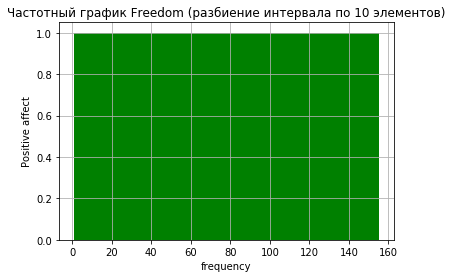

In [39]:
x = df1['Freedom']

n, bins, patches = plt.hist(df1['Positive affect'], len(df1['Freedom']), facecolor='g')


plt.xlabel('frequency')
plt.ylabel('Positive affect')
plt.title('Частотный график Freedom (разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show()

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [11]:
print('Медиана: ', statistics.median(df1['Freedom']))
#print('Мода: ', statistics.mode(df1['Freedom']))
print('Мат.ожидание: ', statistics.mean(df1['Freedom']))
print('Стандартное отклонение: ', statistics.pstdev(df1['Freedom']))
print('Дисперсия: ', statistics.pvariance(df1['Freedom']))
print('Минимум: ',min(df1['Freedom']))
print('Максимум: ',max(df1['Freedom']))
print('Размах: ',max(df1['Freedom']) - min(df1['Freedom']))

Медиана:  78.0
Мат.ожидание:  78.0
Стандартное отклонение:  44.74371464239419
Дисперсия:  2002.0
Минимум:  1.0
Максимум:  155.0
Размах:  154.0


Почему нельзя найти моду?

Моду найти нельзя, т.к. в столбце 'Freedom' только уникальные значения, т.е. ни одно значение не встречается более 1 раза.

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

Коэффициент корреляции Пирсона: 0.6817698430601657
1.5956279484809605e-22


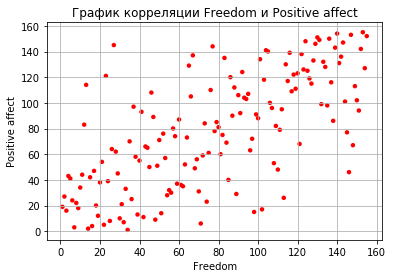

In [15]:
df1.plot.scatter(x = 'Freedom', y = 'Positive affect', c='red', edgecolors='none', grid=True, title='График корреляции Freedom и Positive affect')

corr, p_value = pearsonr(df1['Freedom'], df1['Positive affect'])
print('Коэффициент корреляции Пирсона:', corr)
print(p_value)

На графике видна зависимсоть 2-х показателей, однако корреляция не имеет ярко выраженного характера (коэф. 0,68). 
В целом можно увидеть восходящий тренд, указывающий, что чем больше люди ощущают себя свободнее,тем они счастливее.

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [87]:
#центрование
freedom = df1['Freedom']
print(statistics.mean(freedom))
freedom_1 = freedom - statistics.mean(freedom)
print(statistics.mean(freedom_1))

78.0
0.0


In [85]:
#масштабирование
print(min(freedom_1))
print(max(freedom_1))

from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

freedom_2 = min_max_scaler.fit_transform(np.array(freedom_1).reshape(-1, 1))
print(min(freedom_2))
print(max(freedom_2))

-77.0
77.0
[-1.]
[1.]


Построить матрицу корреляций для всех колонок таблицы

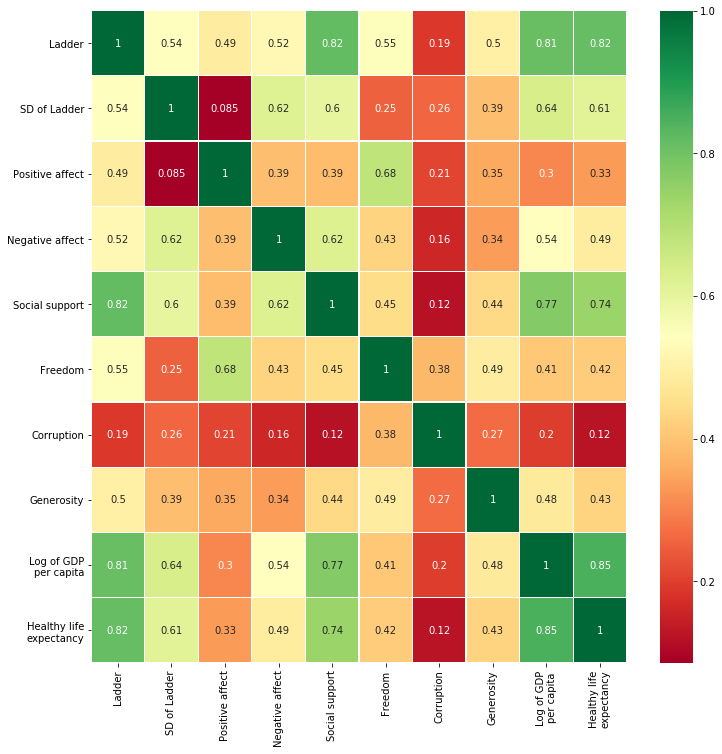

In [89]:
import seaborn as sns
sns.heatmap(df1.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(12,12)
plt.show()

Загрузить таблицу цен на авокадо: 

In [41]:
df_avocado=pd.read_csv('avocado.csv')
df_avocado[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


In [43]:
df_avocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


Сделать частотный график колонки AveragePrice. Какое это распределение?

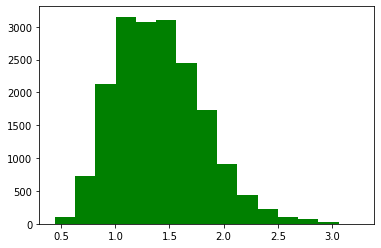

In [53]:
patches_avocado = plt.hist(df_avocado['AveragePrice'], 15, facecolor='g')

Частотный график схож с нормальным распределением с некоторыми отклонениями в сторону большего количества цен ниже среднего

Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

Коэффициент корреляции Пирсона: -0.2083170484878848
4.594934299445524e-178


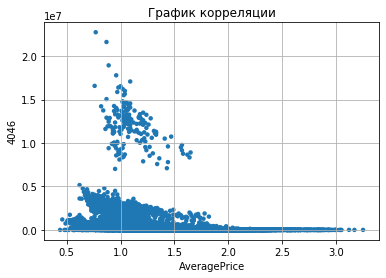

In [56]:
df_avocado.plot.scatter(x = 'AveragePrice', y = '4046',  edgecolors='none', grid=True, title='График корреляции')

corr, p_value = pearsonr(df_avocado['AveragePrice'], df_avocado['4046'])
print('Коэффициент корреляции Пирсона:', corr)
print(p_value)

Коэффициент корреляции Пирсона: -0.1729277725093354
1.724597192741305e-122


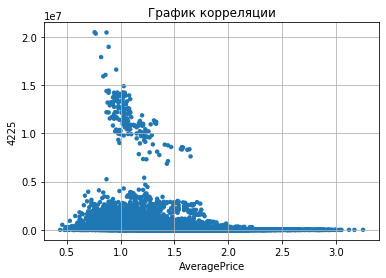

In [55]:
df_avocado.plot.scatter(x = 'AveragePrice', y = '4225',  edgecolors='none', grid=True, title='График корреляции')

corr, p_value = pearsonr(df_avocado['AveragePrice'], df_avocado['4225'])
print('Коэффициент корреляции Пирсона:', corr)
print(p_value)

Коэффициент корреляции Пирсона: -0.17944598397975622
6.73364669363713e-132


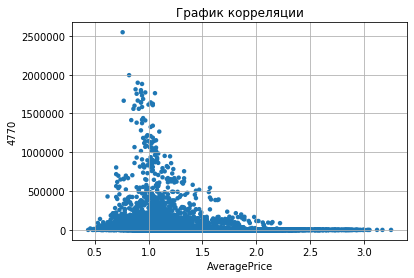

In [57]:
df_avocado.plot.scatter(x = 'AveragePrice', y = '4770',  edgecolors='none', grid=True, title='График корреляции')

corr, p_value = pearsonr(df_avocado['AveragePrice'], df_avocado['4770'])
print('Коэффициент корреляции Пирсона:', corr)
print(p_value)